Практическое задание №2 «Визуализация многомерных данных» Вариант 1

В качестве анализируемого набора данных рассмотрим набор данных Data of rotary machine defects
Для анализа исследованы файлы data_5_1.csv, data_5_2.csv, data_5_3.csv, data_5_4.csv.

1. data_5_1 — нет дефектов,
2. data_5_2 — несоосность в муфте,
3. data_5_3 — наличие дисбаланса,
4. data_5_4 — втулка с дефектами.

В первую очередь импортируем необходимые библиотеки, создадим необходимые переменные

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

counter = 1

names_list1 = ['1 параметр', '2 параметр', '3 параметр', '4 параметр', '5 параметр', '6 параметр', '7 параметр',
               '8 параметр']

names_list2 = ['1 параметр', '2 параметр']

fluctuations = ['Fluctuations_X_in_the_left_bearing', 'Fluctuations_Y_in_the_left_bearing',
                'Fluctuations_X_in_the_right_bearing', 'Fluctuations_Y_in_the_right_bearing',
                'Fluctuations_X_in_the_left_bearing_smooth', 'Fluctuations_Y_in_the_left_bearing_smooth',
                'Fluctuations_X_in_the_right_bearing_smooth', 'Fluctuations_Y_in_the_right_bearing_smooth']

temperatures = ['Temperature_in_the_left_bearing', 'Temperature_in_the_right_bearing']

attributes = ['Fluctuations_X_in_the_left_bearing', 'Fluctuations_Y_in_the_left_bearing',
              'Fluctuations_X_in_the_right_bearing', 'Fluctuations_Y_in_the_right_bearing',
              'Fluctuations_X_in_the_left_bearing_smooth', 'Fluctuations_Y_in_the_left_bearing_smooth',
              'Fluctuations_X_in_the_right_bearing_smooth', 'Fluctuations_Y_in_the_right_bearing_smooth',
              'Temperature_in_the_left_bearing', 'Temperature_in_the_right_bearing']

Получим информацию и статистику о наборах данных на примере сета без дефектов

In [11]:
def main():
    df1 = pd.read_csv('D:\pythonProjects\practice2\datas\data_5_1.csv')

    print(df1.info())

    print()

    print(df1.describe())

if __name__ == '__main__':
    main()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601000 entries, 0 to 600999
Data columns (total 10 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Fluctuations_X_in_the_left_bearing          601000 non-null  float64
 1   Fluctuations_Y_in_the_left_bearing          601000 non-null  float64
 2   Fluctuations_X_in_the_right_bearing         601000 non-null  float64
 3   Fluctuations_Y_in_the_right_bearing         601000 non-null  float64
 4   Fluctuations_X_in_the_left_bearing_smooth   601000 non-null  float64
 5   Fluctuations_Y_in_the_left_bearing_smooth   601000 non-null  float64
 6   Fluctuations_X_in_the_right_bearing_smooth  601000 non-null  float64
 7   Fluctuations_Y_in_the_right_bearing_smooth  601000 non-null  float64
 8   Temperature_in_the_left_bearing             601000 non-null  float64
 9   Temperature_in_the_right_bearing            601000 non-null  float64
d

Исследуем распределение данных в каждом из файлов с помощью гистограмм и ящиков с усами. Ввиду того, что параметры колебаний и температур имеют различные размерности и диапазоны значений, расположим их на отдельных графиках.

Код функции и пример визуализации гистограмм и ящиков с усами для параметров из конкретного набора данных

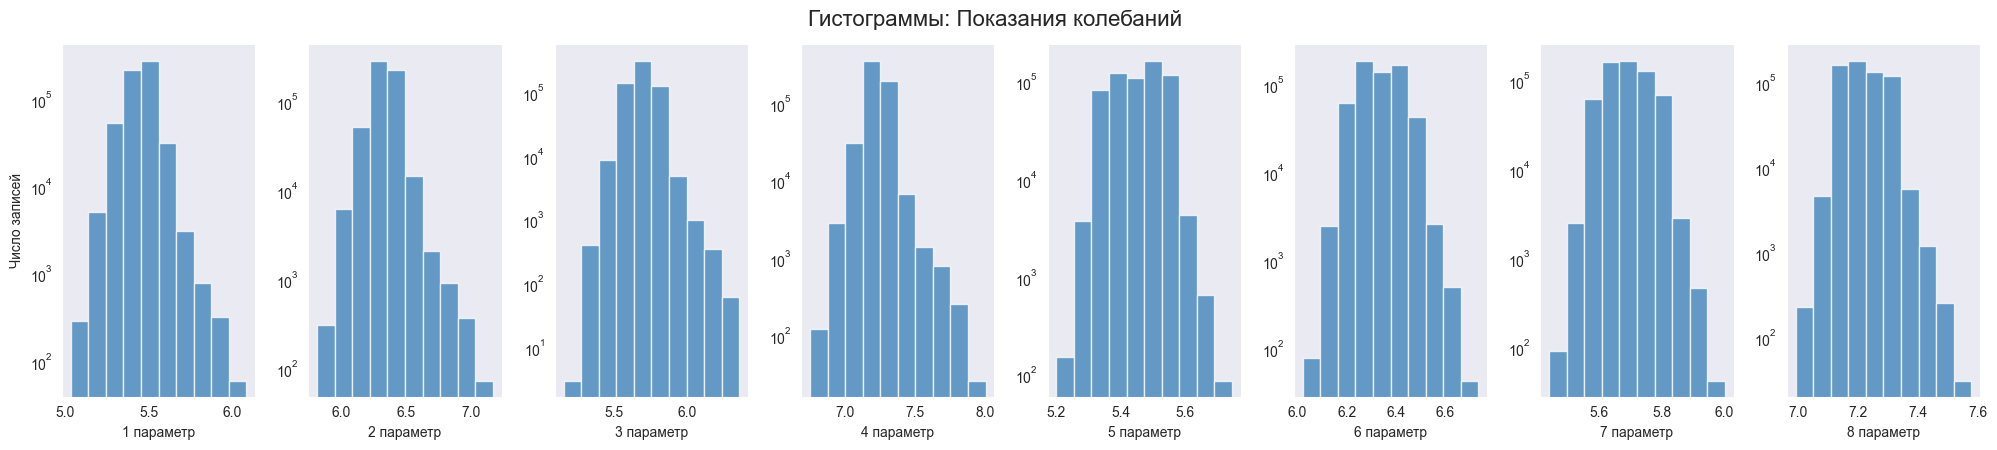

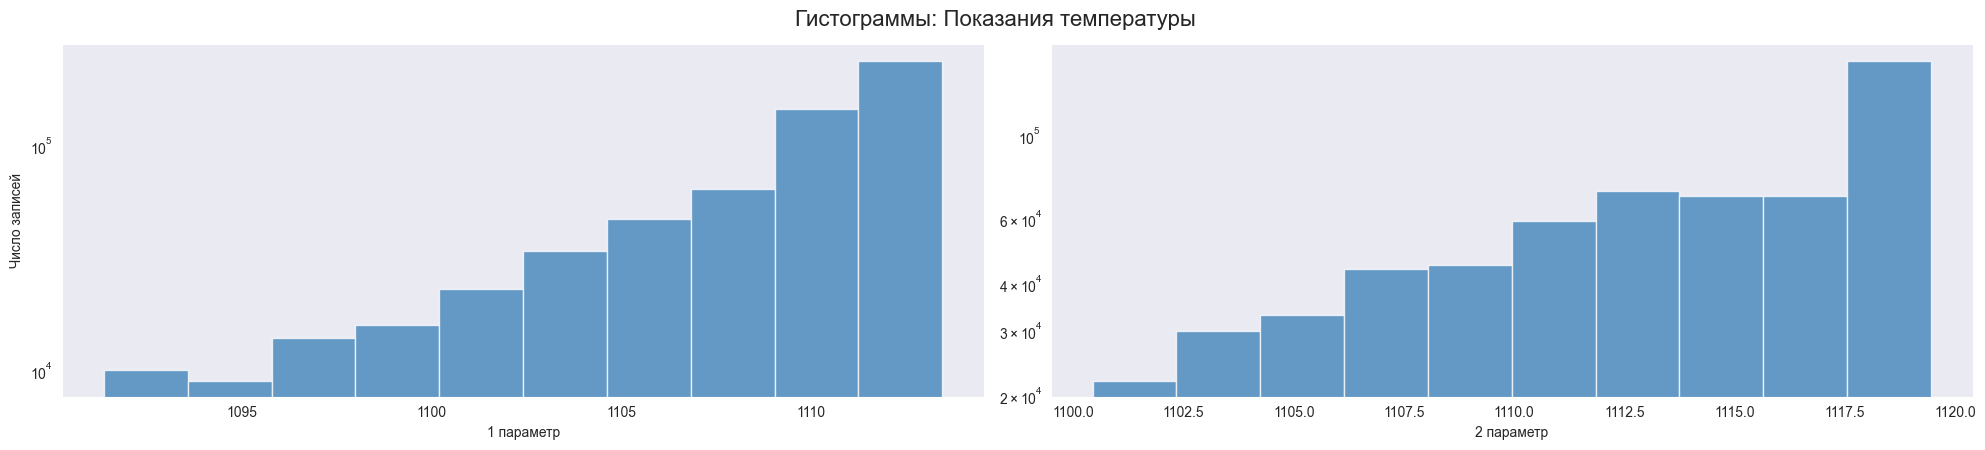

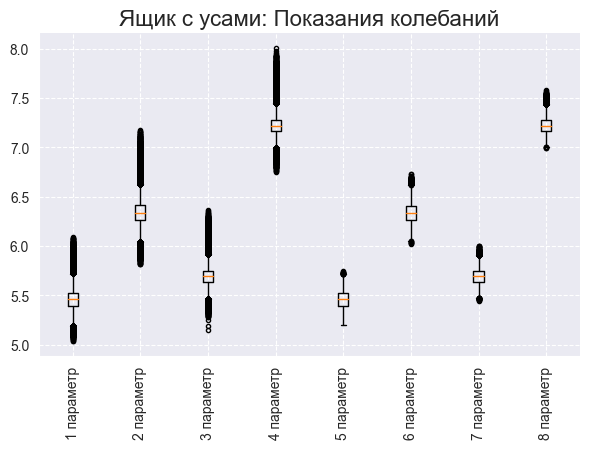

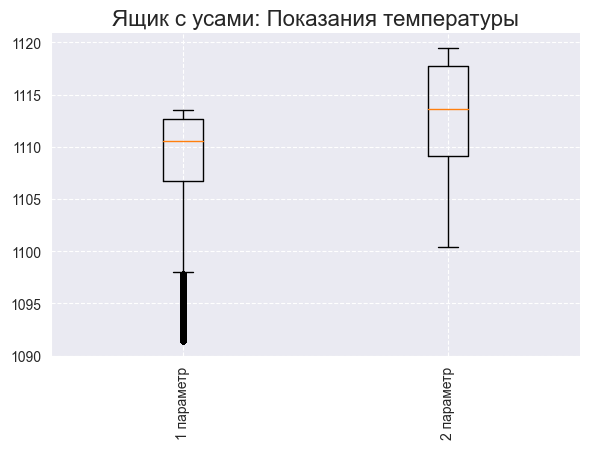

In [2]:
def hist_for_attributes_set(df, labels, ax, bin_num=25, y_scale='linear'):
    global counter
    counter = 1
    for i, col in enumerate(labels):
        ax[i].set_yscale(y_scale)
        ax[i].tick_params(labelsize=10)
        ax[i].set_xlabel(str(counter) + ' параметр')
        counter += 1

        # уберем лишние границы графика
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].grid()

        ax[i].hist(df[col], bin_num, density=False, color='#377eb8', alpha=.75)

def draw_histograms(data_frame):
    fig, ax = plt.subplots(nrows=1, ncols=len(fluctuations), figsize=(20, 5))

    hist_for_attributes_set(data_frame, fluctuations, ax, bin_num=10, y_scale='log')

    ax[0].set_ylabel('Число записей')

    plt.suptitle('Гистограммы: Показания колебаний', fontsize=16, y=.92)

    fig.tight_layout(rect=[0, .03, 1, .95])

    plt.show()

    fig, ax = plt.subplots(nrows=1, ncols=len(temperatures), figsize=(20, 5))

    hist_for_attributes_set(data_frame, temperatures, ax, bin_num=10, y_scale='log')

    ax[0].set_ylabel('Число записей')

    plt.suptitle('Гистограммы: Показания температуры', fontsize=16, y=.92)

    fig.tight_layout(rect=[0, .03, 1, .95])

    plt.show()

def boxplot_for_attributes_set(df, labels, names, ax):
    props = dict(marker='o', markersize=3)

    for i, col in enumerate(labels):
        ax.boxplot(df[col], positions=[i + 1], flierprops=props)  # i + 1
        ax.tick_params(labelsize=10)
        ax.set_xticks(np.arange(len(labels)) + 1, names)

def draw_boxes(data_frame):
    fig, ax = plt.subplots(figsize=(17, 5))
    fig.set_figwidth(6)
    plt.xticks(rotation=90)
    boxplot_for_attributes_set(data_frame, fluctuations, names_list1, ax)
    ax.set_title('Ящик с усами: Показания колебаний', fontsize=16)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    np.arange(0, 101, 5)

    ax.grid(linestyle='--')
    fig.tight_layout(rect=[0, .03, 1, .95])
    plt.show()

    fig, ax = plt.subplots(figsize=(17, 5))
    fig.set_figwidth(6)
    plt.xticks(rotation=90)
    boxplot_for_attributes_set(data_frame, temperatures, names_list2, ax)
    ax.set_title('Ящик с усами: Показания температуры', fontsize=16)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    np.arange(0, 101, 5)

    ax.grid(linestyle='--')
    fig.tight_layout(rect=[0, .03, 1, .95])
    plt.show()

def main():
    df1 = pd.read_csv('D:\pythonProjects\practice2\datas\data_5_1.csv')
    draw_histograms(df1)
    draw_boxes(df1)

if __name__ == '__main__':
    main()


На основании представленных выше графиков можно сделать вывод, что значения показаний колебаний во всех вариантах эксперимента распределены достаточно близко к нормальному закону, тогда как показания температуры в большинстве случаев возрастает.  Однако на основании обособленных графиков сложно судить о влиянии отдельных дефектов на показания, поэтому ниже приведены гистограммы, показывающие совпадения показаний (бордовый цвет), показания эксперимента без дефектов(синий) и при влиянии того или иного дефекта (бледно красный).

Код функции и пример визуализации двух гистограмм для параметров из различных наборов данных

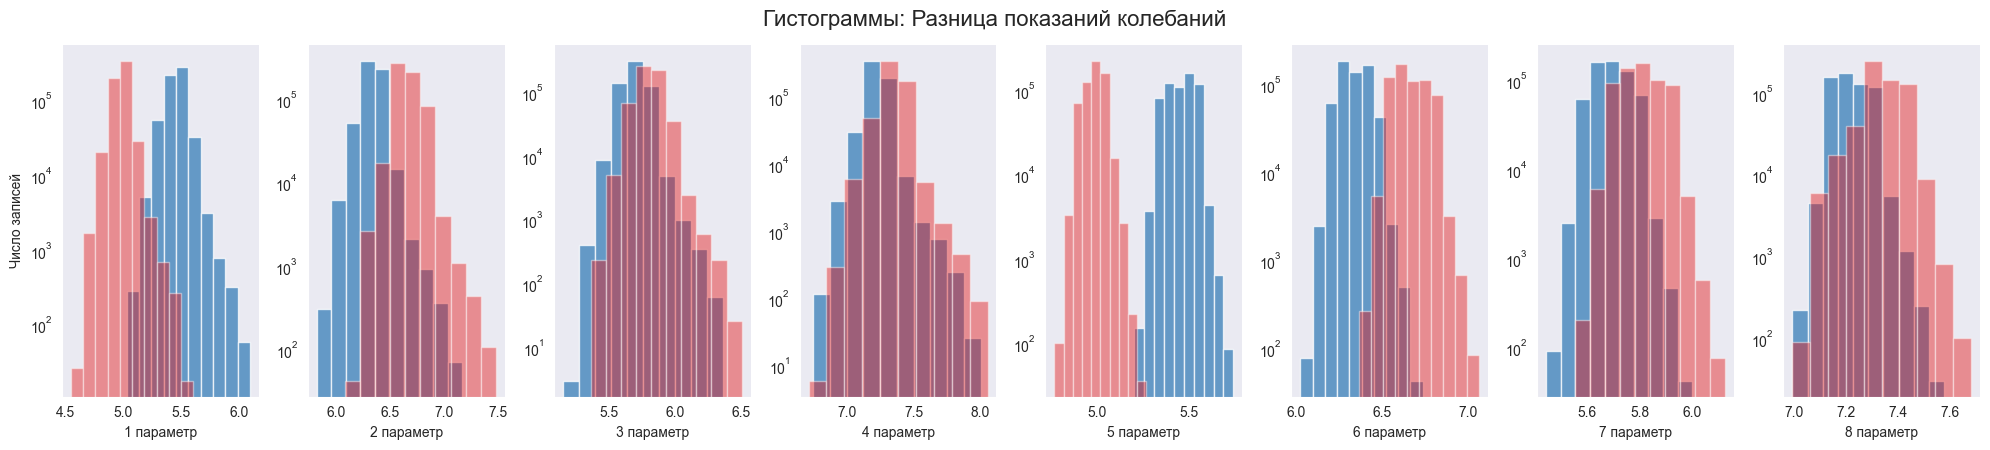

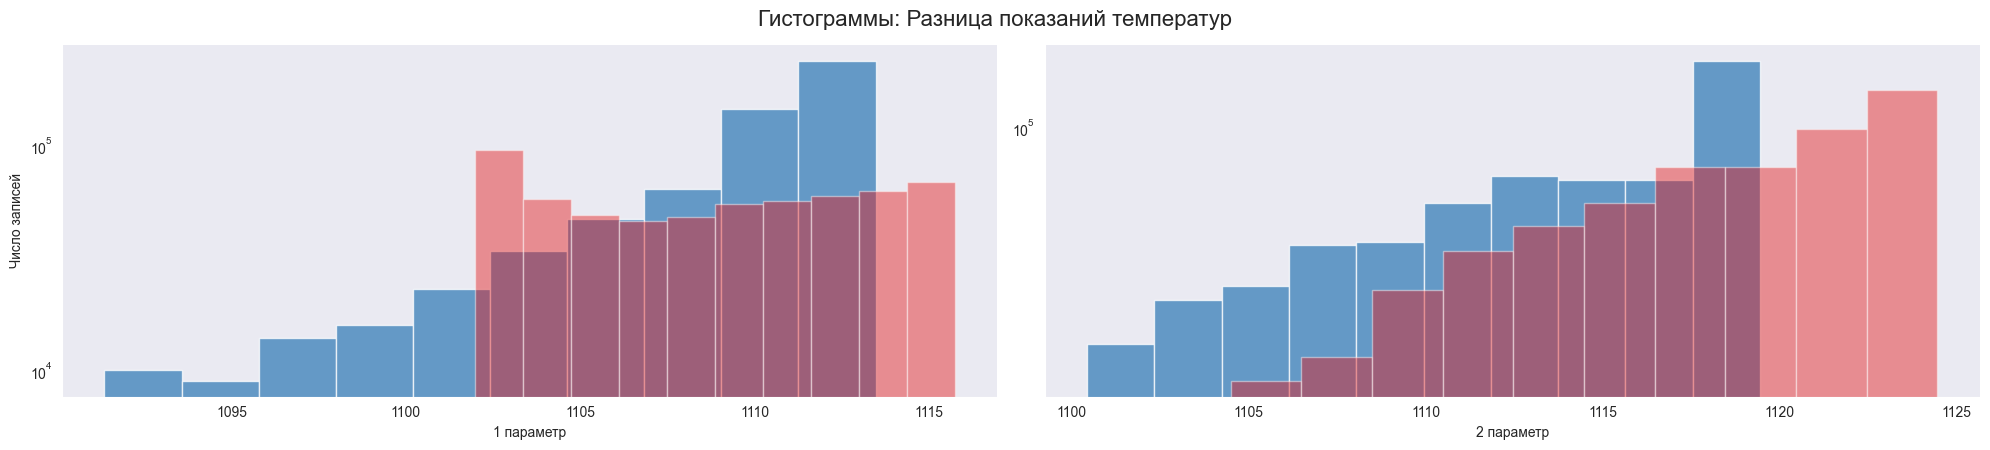

In [3]:
def hist_for_2attributes_set(df_first, df_second, labels, ax, bin_num=25, y_scale='linear'):
    global counter
    counter = 1
    for i, col in enumerate(labels):
        ax[i].set_yscale(y_scale)
        ax[i].tick_params(labelsize=10)
        ax[i].set_xlabel(str(counter) + ' параметр')
        counter += 1

        # уберем лишние границы графика
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].grid()

        ax[i].hist(df_first[col], bin_num, density=False, color='#377eb8', alpha=.75)
        ax[i].hist(df_second[col], bin_num, density=False, color='#e41a1c', alpha=.45)

def draw_2histograms(data_frame1, data_frame2):
    fig, ax = plt.subplots(nrows=1, ncols=len(fluctuations), figsize=(20, 5))

    hist_for_2attributes_set(data_frame1, data_frame2, fluctuations, ax, bin_num=10, y_scale='log')

    ax[0].set_ylabel('Число записей')

    plt.suptitle('Гистограммы: Разница показаний колебаний', fontsize=16, y=.92)

    fig.tight_layout(rect=[0, .03, 1, .95])

    plt.show()

    fig, ax = plt.subplots(nrows=1, ncols=len(temperatures), figsize=(20, 5))

    hist_for_2attributes_set(data_frame1, data_frame2, temperatures, ax, bin_num=10, y_scale='log')

    ax[0].set_ylabel('Число записей')

    plt.suptitle('Гистограммы: Разница показаний температур', fontsize=16, y=.92)

    fig.tight_layout(rect=[0, .03, 1, .95])

    plt.show()

def main():
    df1 = pd.read_csv('D:\pythonProjects\practice2\datas\data_5_1.csv')
    df2 = pd.read_csv('D:\pythonProjects\practice2\datas\data_5_2.csv')
    draw_2histograms(df1, df2)

if __name__ == '__main__':
    main()

Однако подобное распределение по частоте встречаемости записей не даёт информации о зависимости значений и времени, поэтому изобразим их в порядке появления среди записей для первых 8 атрибутов с целью определения переходного периода системы, а также сравнение температур на протяжении всего времени измерений для стандартного набора данных и данных с дефектом.

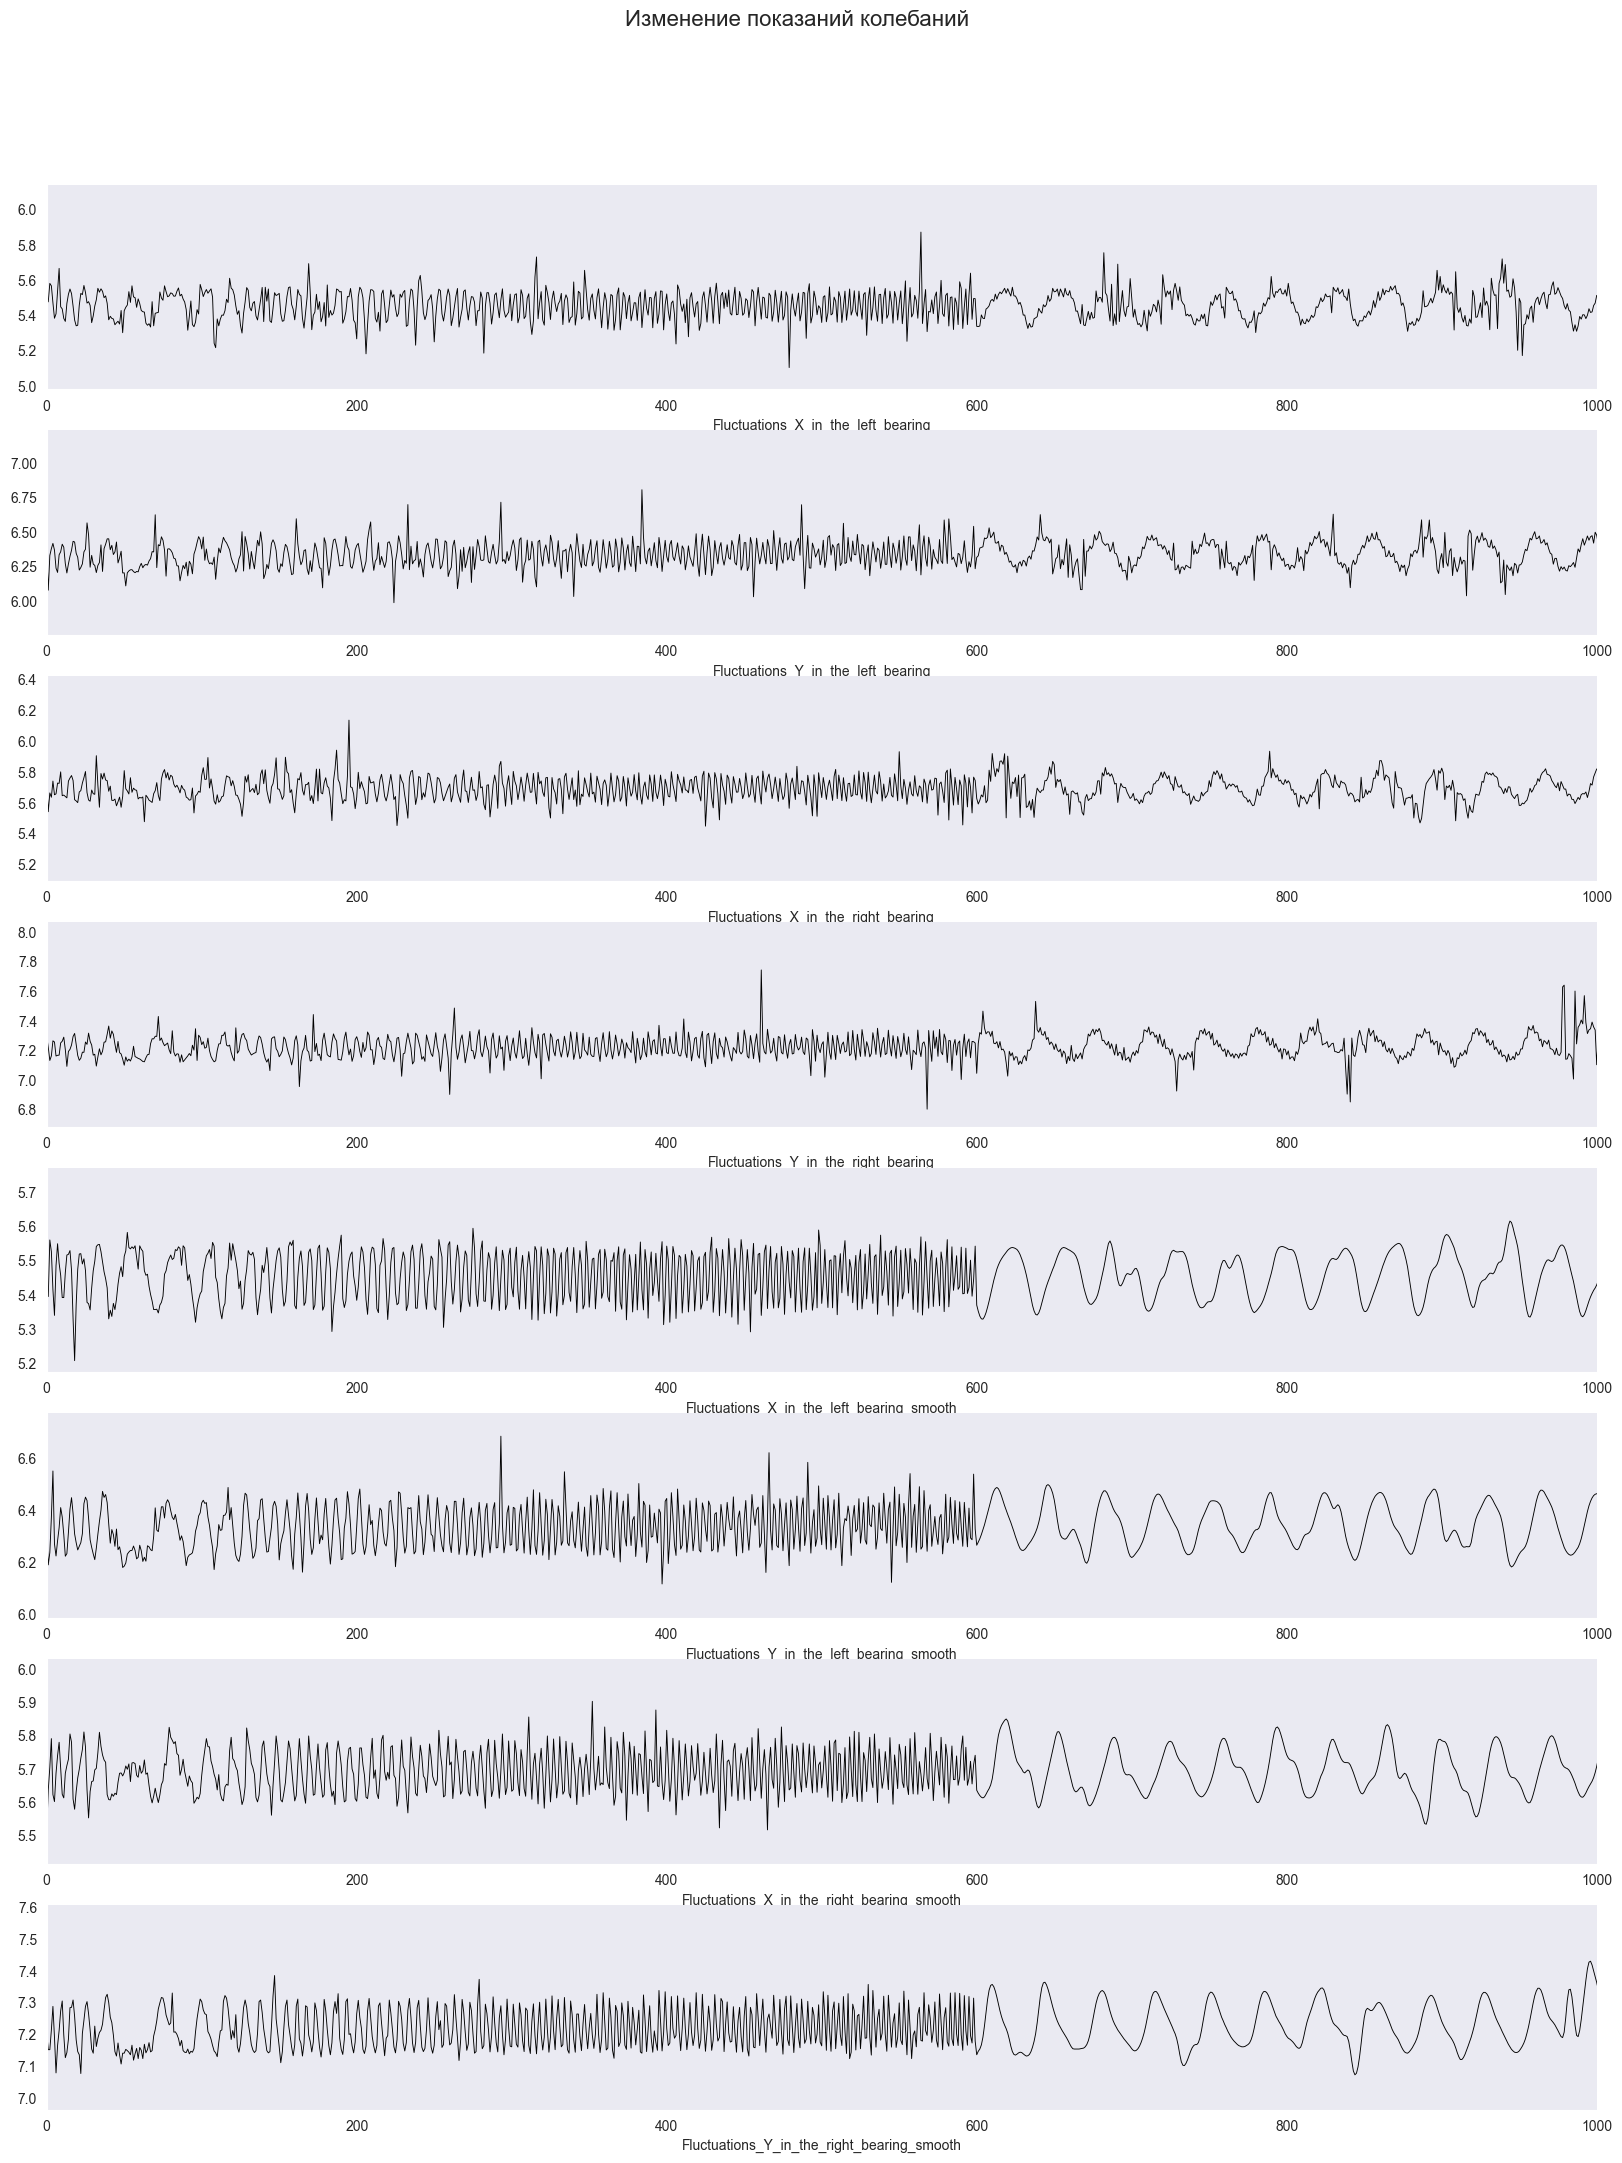

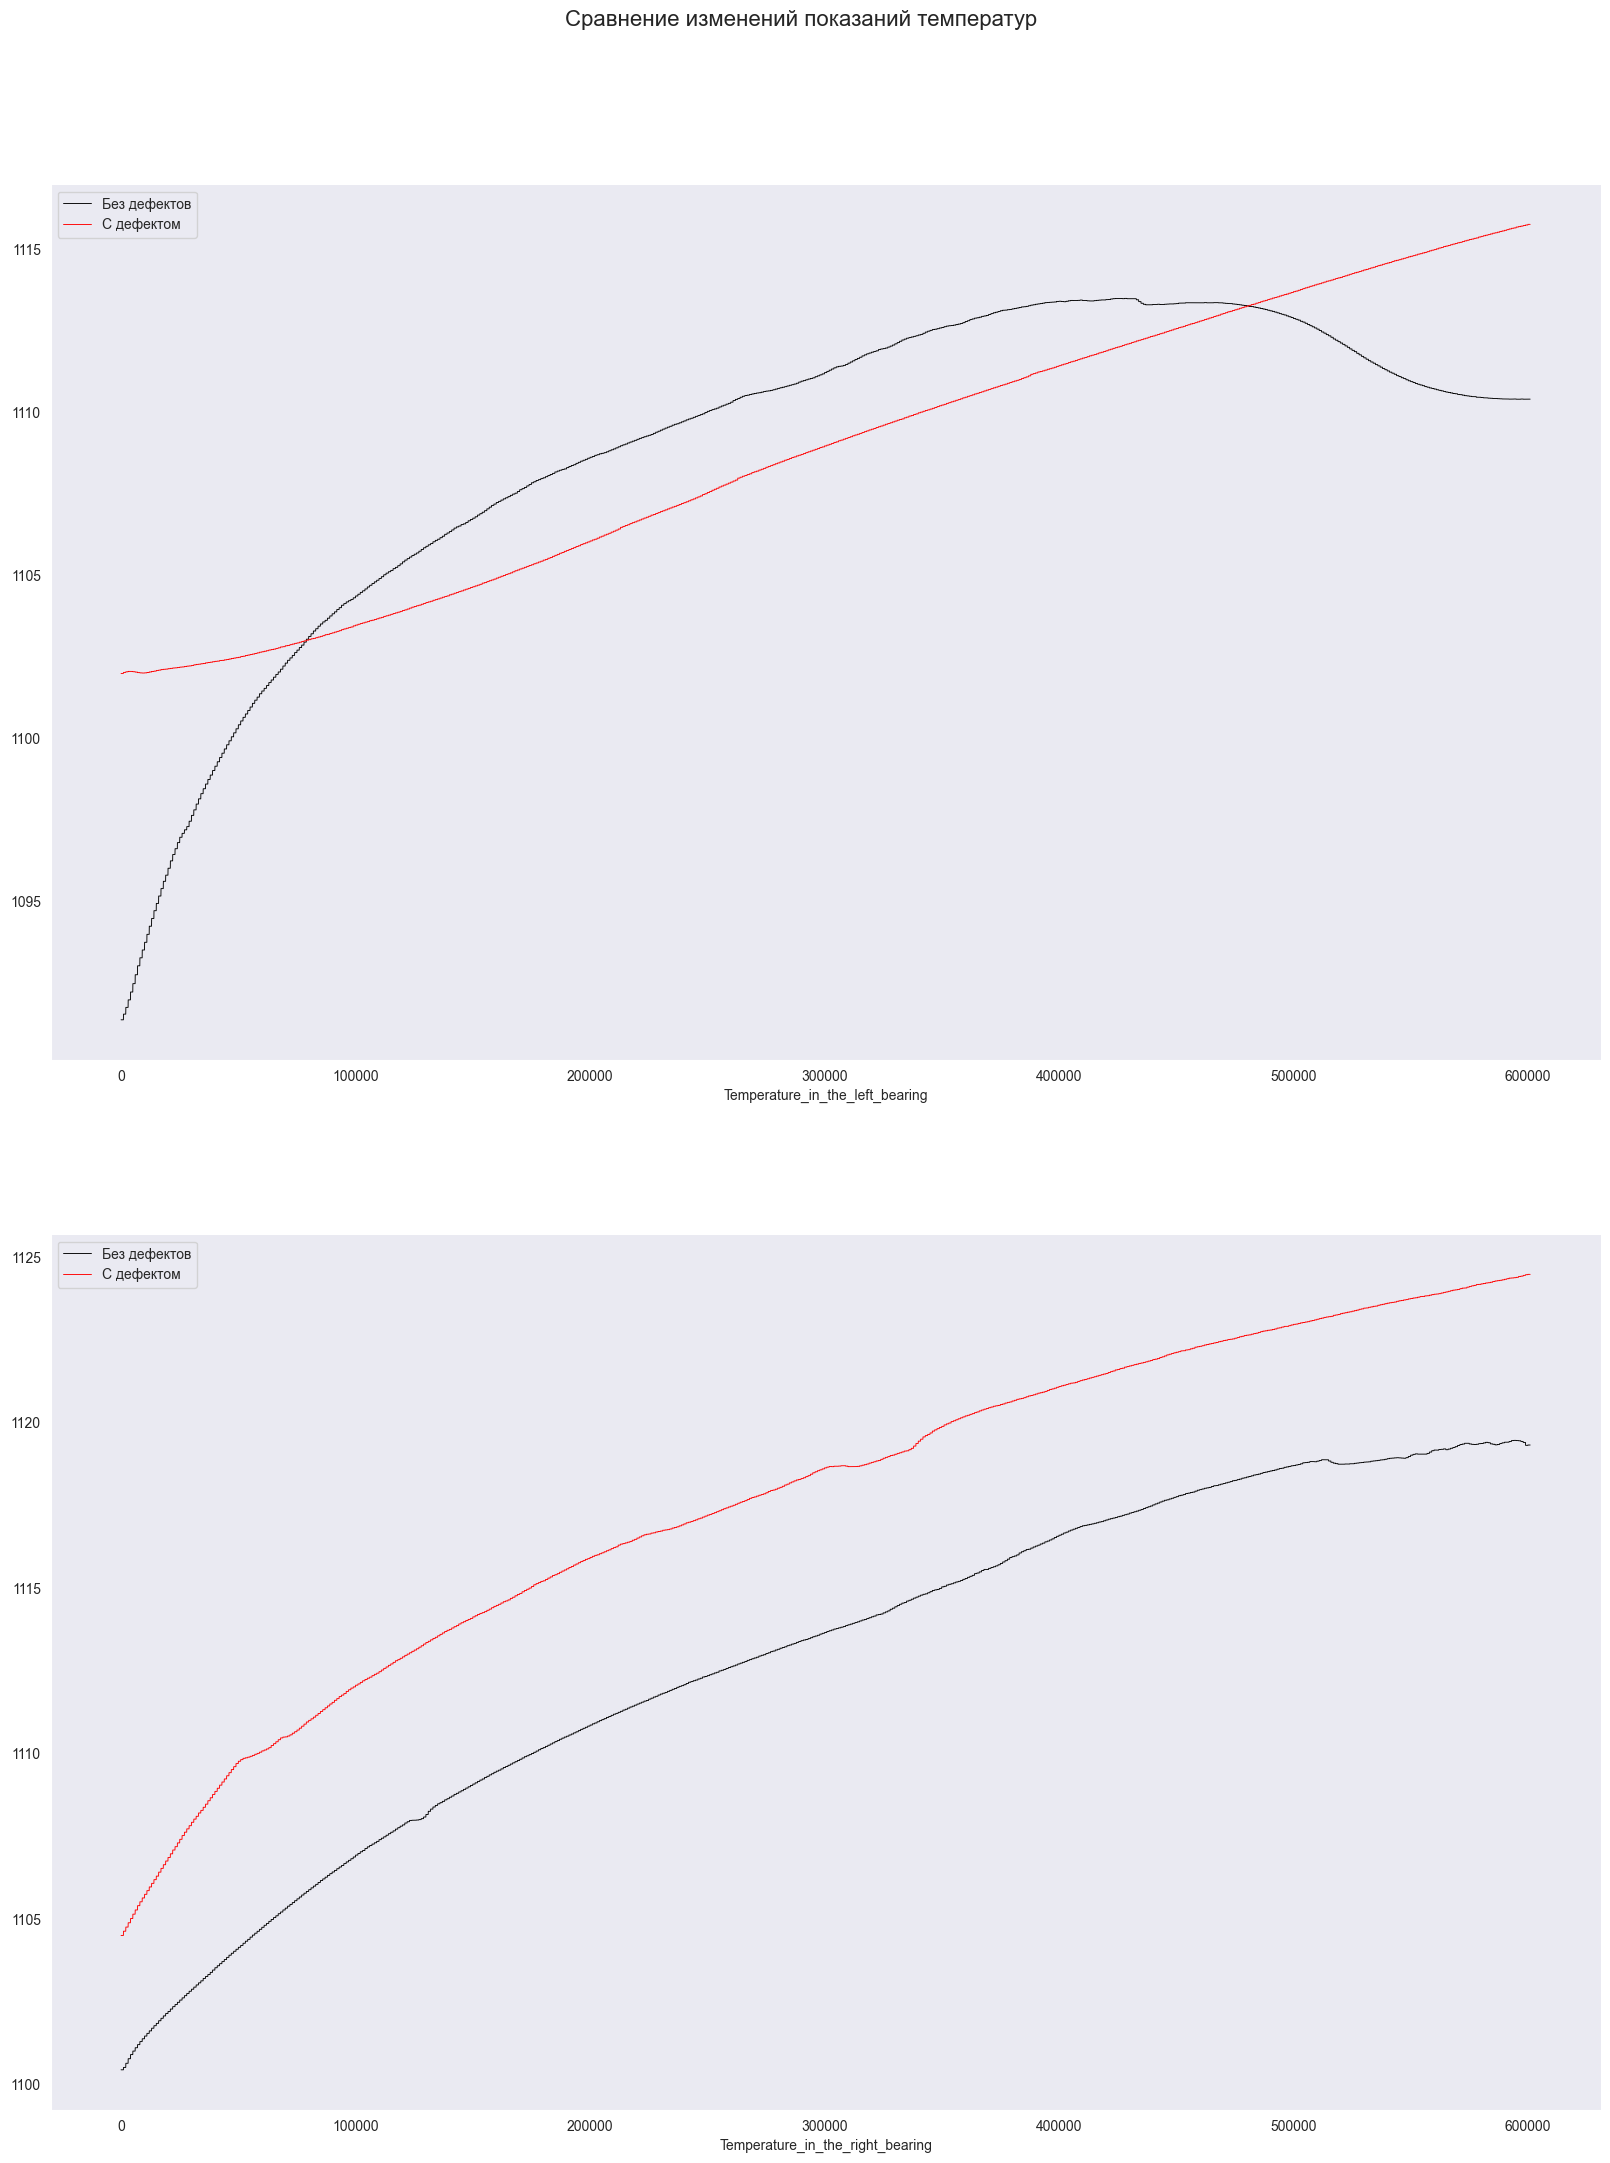

In [4]:
def line_plot_for_attribute_set(df, labels, ax):
    for i, col in enumerate(labels):
        ax[i].set_xlabel(col)
        ax[i].plot(df[col], color='black', linewidth=.65)

        # уберем лишние границы графика
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].grid()
        ax[i].set_xlim(0, 1000)

def line_plot_for_2attribute_set(df_1, df_2, labels, ax):
    for i, col in enumerate(labels):
        ax[i].set_xlabel(col)
        ax[i].plot(df_1[col], color='black', linewidth=.65)
        ax[i].plot(df_2[col], color='red', linewidth=.65)

        # уберем лишние границы графика
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].grid()
        ax[i].legend(['Без дефектов', 'С дефектом'])

def draw_line_plot(data_frame1, data_frame2):
    fig, ax = plt.subplots(nrows=len(fluctuations), ncols=1, figsize=(20, 25))

    line_plot_for_attribute_set(data_frame1, fluctuations, ax)
    fig.suptitle('Изменение показаний колебаний', fontsize=16, y=0.95)
    plt.show()

    fig, ax = plt.subplots(nrows=len(temperatures), ncols=1, figsize=(20, 25))

    line_plot_for_2attribute_set(data_frame1, data_frame2, temperatures, ax)
    fig.suptitle('Сравнение изменений показаний температур', fontsize=16, y=0.95)

    plt.show()

def main():
    df1 = pd.read_csv('D:\pythonProjects\practice2\datas\data_5_1.csv')
    df2 = pd.read_csv('D:\pythonProjects\practice2\datas\data_5_2.csv')
    draw_line_plot(df1, df2)

if __name__ == '__main__':
    main()

Код функции и пример визуализации матрицы корреляции для параметров конкретного набора данных

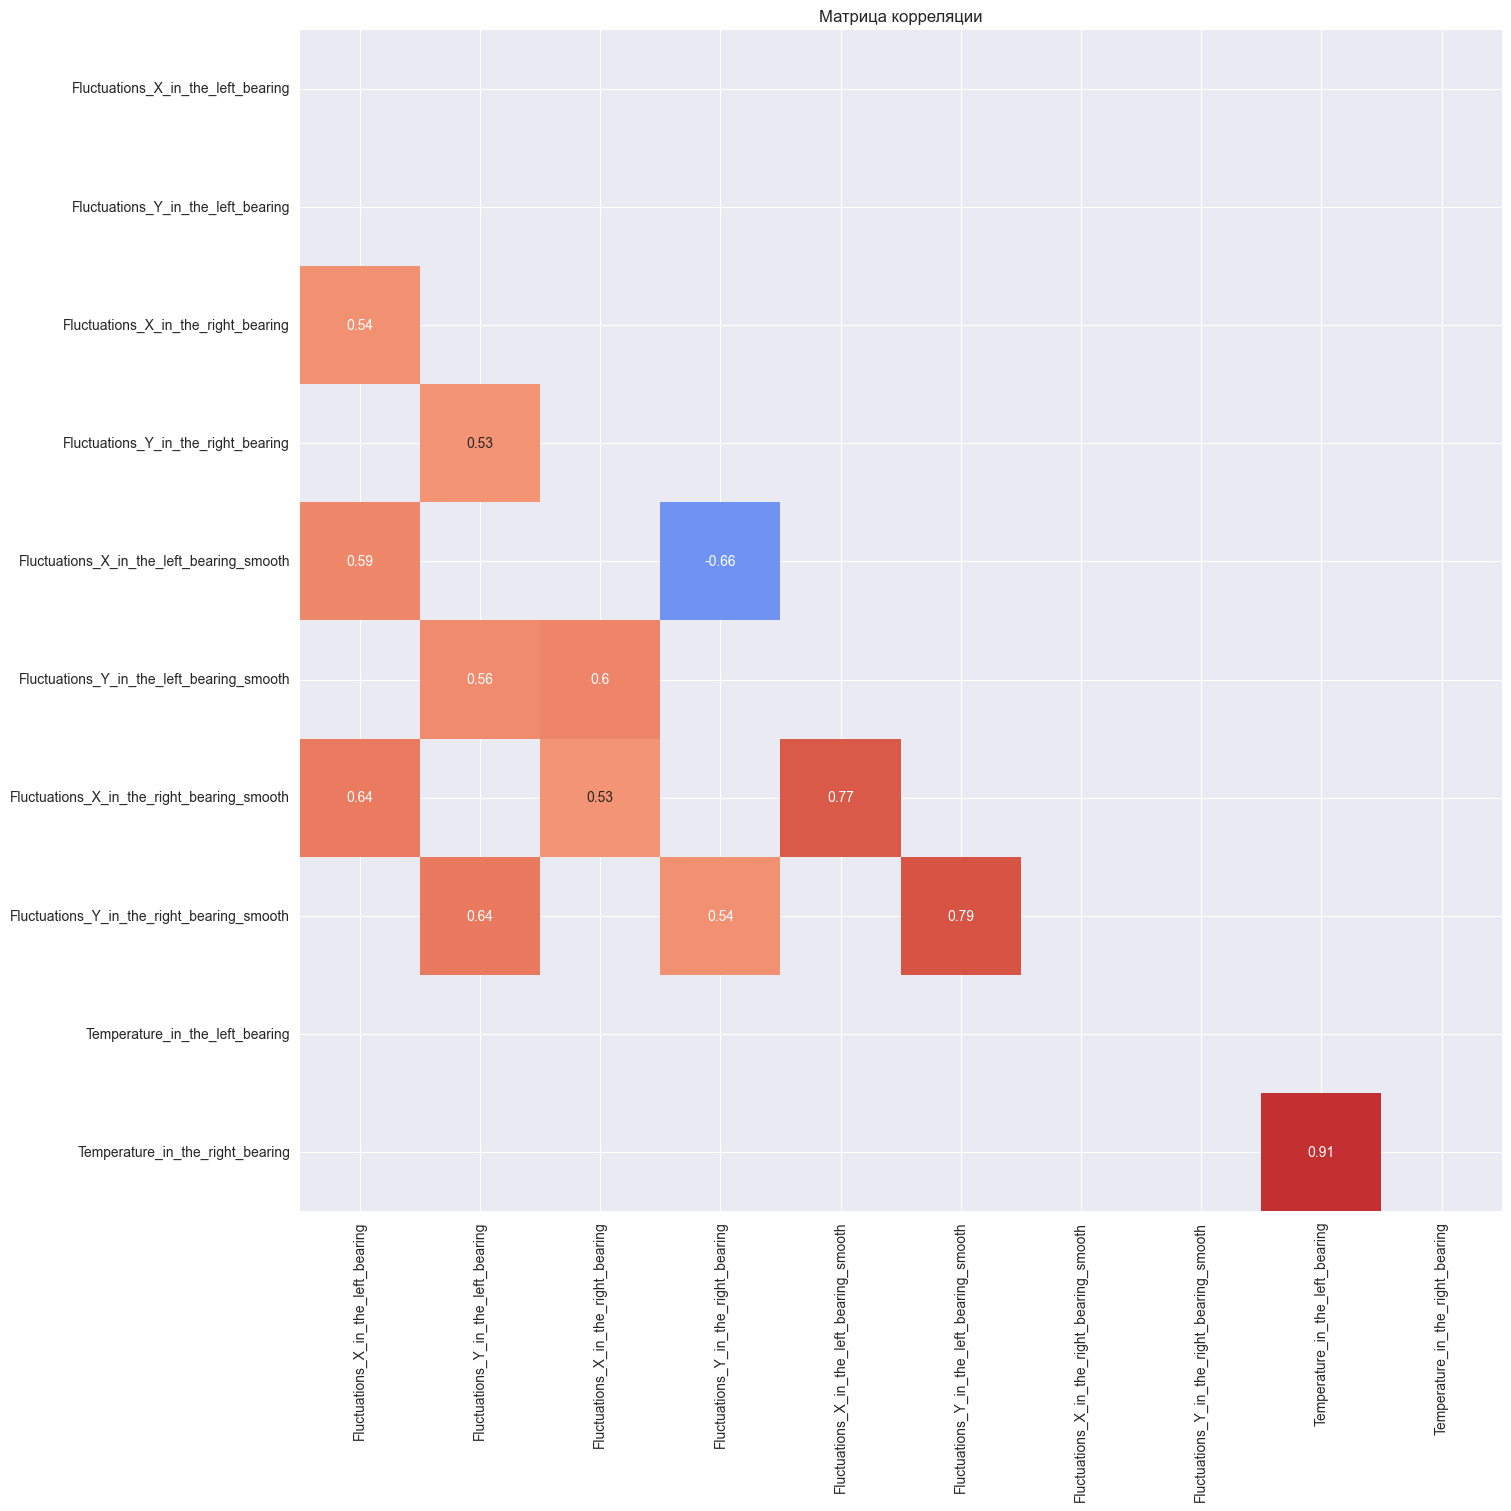

In [5]:
def heatmap(df, ax, title):
    corr = df.corr()

    # пропустим пары со слабой корреляцией, попробуем поэкспериментировать с этой настройкой
    df_corr = corr[(corr >= .5) | (corr <= -.5)]

    # print(f'Empty columns: {get_empty_columns_names(df_corr)}')

    mask = np.triu(np.ones_like(corr))
    sns.heatmap(
        df_corr,
        cbar=False,
        mask=mask,
        ax=ax,
        annot=True,
        cmap='coolwarm',
        vmin=-1,
        vmax=1,
    )

    ax.title.set_text(title)
    ax.tick_params(
        top=False,
        bottom=False,
        left=False,
        right=False,
    )

def draw_heatmap(data_frame):
    fig, ax = plt.subplots(figsize=(15, 15), constrained_layout=True)
    heatmap(data_frame[attributes], ax, 'Матрица корреляции')
    plt.show()

def main():
    df1 = pd.read_csv('D:\pythonProjects\practice2\datas\data_5_1.csv')
    draw_heatmap(df1)

if __name__ == '__main__':
    main()

Наконец, обратим внимание на код функции и пример применения преобразования PCA к конкретному набору данных

In [6]:
def get_pca(data_frame):
    x = data_frame[attributes].values

    # нормализуем значения
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=3)
    pca.fit_transform(x)
    print(f'Explained variance: {pca.explained_variance_ratio_}\tSum: {pca.explained_variance_ratio_.sum()}\n')

def main():
    df1 = pd.read_csv('D:\pythonProjects\practice2\datas\data_5_1.csv')
    get_pca(df1)

if __name__ == '__main__':
    main()

Explained variance: [0.32315343 0.30436483 0.18940488]	Sum: 0.8169231347846984

